# Imports


In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy.fft import dct, idct
import scipy.sparse.linalg
import numpy as np
import pickle as pkl
from PIL import Image as im 
import scipy.io as sio
from numpy import *
from numpy.ma.core import argmax
from pylab import *
from numpy import linalg as LA
from scipy.sparse.linalg import eigs
from scipy.stats import stats
import scipy.spatial.distance as ssd
import statistics as statistics

# Import Data


In [ ]:
!gdown https://ese224.seas.upenn.edu/wp-content/uploads/2021/04/lab13_data.zip
!unzip -o lab13_data.zip
mat = scipy.io.loadmat("geneNetwork_rawPCNCI.mat") 
signalMutation = scipy.io.loadmat("signal_mutation.mat")
histology = scipy.io.loadmat("histology_subtype.mat") 

Downloading...
From: https://ese224.seas.upenn.edu/wp-content/uploads/2021/04/lab13_data.zip
To: /content/lab13_data.zip
100% 113k/113k [00:00<00:00, 616kB/s]
Archive:  lab13_data.zip
  inflating: geneNetwork_rawPCNCI.mat  
  inflating: histology_subtype.mat   
  inflating: signal_mutation.mat     


# Section 2.1

Loops = 1525
Symmetric: True
Weighted: False
Laplacian with and without self-loops are equal: True


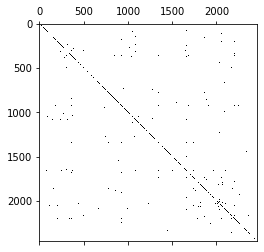

In [ ]:
a = mat['geneNetwork_rawPCNCI'] 
matplotlib.pylab.spy(a) 

loops = np.sum(np.diagonal(a) != 0) 
print("Loops = " + str(loops)) 

# Check symmetric (undirected) 
a_t = a.transpose() 
print("Symmetric: " + str(np.array_equal(a, a_t))) 


# Check unweighted 
weighted = np.max((np.max(a)) > 1) 
print("Weighted: " + str(weighted)) 

# Construct Laplacian (with self loops) 
D = np.diag(np.sum(a != 0 , 1))
lap = D - a 

# Remove diagonals 
ad = a - np.diag(np.diag(a)) 

# Construct new Laplacian with diagonals removed 
D_new = np.diag(np.sum(ad != 0, 1))
lap_new = D_new - ad 

print("Laplacian with and without self-loops are equal: " + str(np.array_equal(lap, lap_new)))




# Section 2.2


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


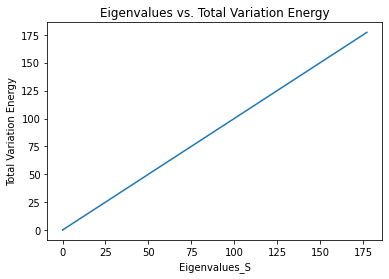

In [ ]:
# Get eigendecomposition of S = L
S = lap 
eigenvalues_S, eigenvectors_S = LA.eig(lap) 
d = np.diag(eigenvalues_S) 

# Compute total variation energy 
# We know that the total variation energy of eigenvector v_k is simply its associated eigenvalues (from lecture) 

TVE = eigenvalues_S 

plt.plot(eigenvalues_S, TVE) 
plt.ylabel("Total Variation Energy") 
plt.xlabel("Eigenvalues_S") 
plt.title("Eigenvalues vs. Total Variation Energy") 
plt.show() 


# Section 3.1 

In [ ]:
mat_m = mat['geneNetwork_rawPCNCI'] 
print(mat_m.shape)
signal_m = signalMutation['signal_mutation'] 
print(signal_m.shape)
histology_m = histology['histology_subtype'] 
print(histology_m.shape)

(2458, 2458)
(240, 2458)
(240, 1)


In [ ]:
D = np.diag(np.sum(a != 0 , 0))
lap = D - a 
lap = lap.astype('F') 
print(D.shape) 

# Since almost all relevant information is from the first 10 eigenvalues 
# (from Lecture 4/11), we can simply take the eigenvalues and their 
# corresponding eigenvectors to be representative 
[eigenvalues, eigenvectors] = eigs(mat_m, k=2458) 
H = eigenvectors.transpose() 
print(H.shape)

(2458, 2458)


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


(2458, 2458)


[0.00073551 0.00277156 0.00429124 ... 0.00406785 0.0003252         nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


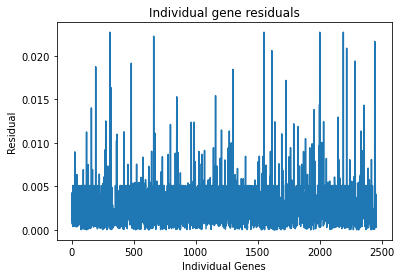

In [ ]:
# SOLUTION 1 
gft = np.zeros((240, 2458))
for i in range(0,239): 
  gft[i, :] = (signal_m[i, :] * H[i, :]) 
hist1 = np.zeros(np.sum(histology_m == 1))
hist2 = np.zeros(np.sum(histology_m == 2))
k = 0
j = 0
# Find indices of hist1 and hist2 
for i in range(0, (histology_m.shape[0] - 1)):
  if (histology_m[i, :] == 1): 
    hist1[k] = i
    k += 1 
  elif(histology_m[i, :] == 2): 
    hist2[j] = i
    j += 1 

# Find the indicators 
indicator1 = np.zeros((hist1.shape[0], gft.shape[1]))
indicator2 = np.zeros((hist2.shape[0], gft.shape[1]))

for i in range(0, hist1.shape[0]): 
  indicator1[i, :] = gft[int((hist1[i])), :] 

for i in range(0, hist2.shape[0]): 
  indicator2[i, :] = gft[int((hist2[i])), :] 
mu1 = np.mean(indicator1, 0)
mu2 = np.mean(indicator2, 0)

n = np.sum(np.abs(gft), 0)
res = abs(mu1-mu2) 
new = np.divide(res, n) 
print(new)

# Plot DP(v_k) versus k for all frequency indicies k
plt.plot(range(0, signal_m.shape[1]), np.abs(new))
plt.ylabel("Residual") 
plt.xlabel("Individual Genes") 
plt.title("Individual gene residuals") 
plt.show() 

# Section 3.2 

{'boxes': [<matplotlib.lines.Line2D at 0x7f16526a0450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f16526a6490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f16526ae4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f16526a6f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f16526a09d0>,
  <matplotlib.lines.Line2D at 0x7f16526a0f10>]}

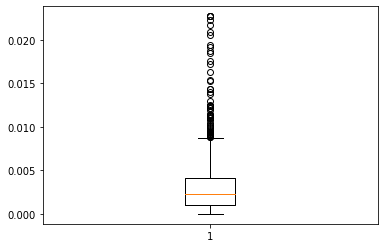

In [ ]:
filtered_data = (np.abs(new))[~np.isnan(np.abs(new))]
plt.boxplot(filtered_data) 

# Section 4.1

In [ ]:
class nearest_neighbors:
  def __init__(self, Z, y, k):
    self.Z = Z
    self.y = y
    self.k = k

  def solve(self):
    d = ssd.squareform(ssd.pdist(self.Z, 'euclidean'))
    nn = d.argsort(axis=0)
    nn_label = self.y[nn[1:(self.k+1), :]]
    nn_label = nn_label.T
    nn_label = nn_label[0]
    prediction = np.zeros(len(nn_label))
    for i in range(len(nn_label)):
      prediction[i] = stats.mode(nn_label[i]).mode[0]
    counter = 0
    for i in range(len(nn_label)):
      if prediction[i] == self.y[i][0]:
        counter += 1
    return counter / len(prediction)

1 nearest neighbors, Accuracy: 0.8375
2 nearest neighbors, Accuracy: 0.8
3 nearest neighbors, Accuracy: 0.875
4 nearest neighbors, Accuracy: 0.8875
5 nearest neighbors, Accuracy: 0.8791666666666667
6 nearest neighbors, Accuracy: 0.9
7 nearest neighbors, Accuracy: 0.8708333333333333
8 nearest neighbors, Accuracy: 0.8875
9 nearest neighbors, Accuracy: 0.8541666666666666


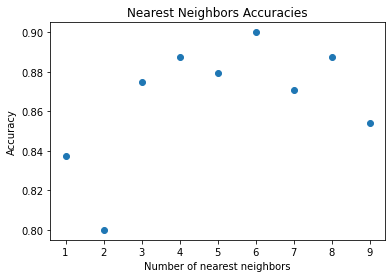

In [ ]:
if __name__ == '__main__':
  list_of_ks = range(1, 10)
  accuracies = [] 
  for k in list_of_ks:
    neighbors = nearest_neighbors(signal_m, histology_m, k)
    accuracies = accuracies + [neighbors.solve()]
    print(k, "nearest neighbors, Accuracy:", neighbors.solve())

plt.scatter(list_of_ks, accuracies) 
plt.ylabel("Accuracy") 
plt.xlabel("Number of nearest neighbors") 
plt.title("Nearest Neighbors Accuracies") 
plt.show() 


# Section 4.2

[0.00073551 0.00277156 0.00429124 ... 0.00406785 0.0003252         nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


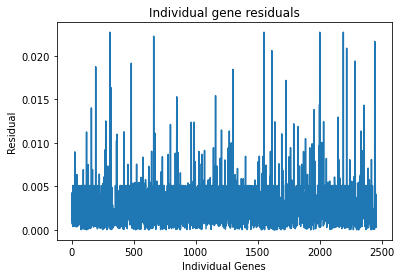

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1 nearest neighbors, Accuracy: 0.8166666666666667
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3 nearest neighbors, Accuracy: 0.8166666666666667
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
5 nearest neighbors, Accuracy: 0.8166666666666667
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
7 nearest neighbors, Accuracy: 0.8166666666666667


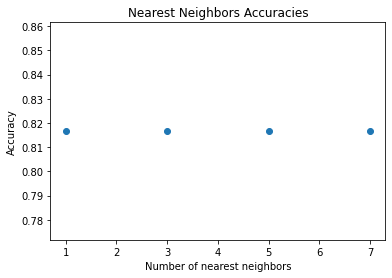

In [ ]:
# Evaluate DP using all the eigenvectors
# Iterate through collection to find eigenvector with biggest DP 
# If k = 1 and v1 gives biggest eigenvector, then H(1) = 1--from 0 to N

gft = np.zeros((240, 2458))
for i in range(0,239): 
  gft[i, :] = (signal_m[i, :] * H[i, :]) 
hist1 = np.zeros(np.sum(histology_m == 1))
hist2 = np.zeros(np.sum(histology_m == 2))
k = 0
j = 0
# Find indices of hist1 and hist2 
for i in range(0, (histology_m.shape[0] - 1)):
  if (histology_m[i, :] == 1): 
    hist1[k] = i
    k += 1 
  elif(histology_m[i, :] == 2): 
    hist2[j] = i
    j += 1 

# Find the indicators 
indicator1 = np.zeros((hist1.shape[0], gft.shape[1]))
indicator2 = np.zeros((hist2.shape[0], gft.shape[1]))

for i in range(0, hist1.shape[0]): 
  indicator1[i, :] = gft[int((hist1[i])), :] 

for i in range(0, hist2.shape[0]): 
  indicator2[i, :] = gft[int((hist2[i])), :] 
mu1 = np.mean(indicator1, 0)
mu2 = np.mean(indicator2, 0)

n = np.sum(np.abs(gft), 0)
res = abs(mu1-mu2)
new = np.divide(res, n) 
print(new)

# Plot DP(v_k) versus k for all frequency indicies k
plt.plot(range(0, signal_m.shape[1]), np.abs(new))
plt.ylabel("Residual") 
plt.xlabel("Individual Genes") 
plt.title("Individual gene residuals") 
plt.show() 

if __name__ == '__main__':
  list_of_ks = [1, 3, 5, 7]
  filter_H = []
  for i in range(len(new)):
    if (np.argmax(new[i]) == i):
      filter_H.append(1)
    else:
      filter_H.append(0) 
  accuracies = []
  for k in list_of_ks:
    temp = filter_H * signal_m
    print(temp)
    neighbors = nearest_neighbors(temp, histology_m, k)
    accuracies = accuracies + [neighbors.solve()]
    print(k, "nearest neighbors, Accuracy:", neighbors.solve())

  plt.scatter(list_of_ks, accuracies) 
  plt.ylabel("Accuracy") 
  plt.xlabel("Number of nearest neighbors") 
  plt.title("Nearest Neighbors Accuracies") 
  plt.show() 

1 nearest neighbors, Accuracy: 0.75 p-value: 0.8291666666666667
1 nearest neighbors, Accuracy: 0.8 p-value: 0.8458333333333333
1 nearest neighbors, Accuracy: 0.85 p-value: 0.8458333333333333
1 nearest neighbors, Accuracy: 0.9 p-value: 0.8458333333333333
1 nearest neighbors, Accuracy: 0.95 p-value: 0.8458333333333333
3 nearest neighbors, Accuracy: 0.75 p-value: 0.8541666666666666
3 nearest neighbors, Accuracy: 0.8 p-value: 0.8791666666666667
3 nearest neighbors, Accuracy: 0.85 p-value: 0.8791666666666667
3 nearest neighbors, Accuracy: 0.9 p-value: 0.8791666666666667
3 nearest neighbors, Accuracy: 0.95 p-value: 0.8791666666666667
5 nearest neighbors, Accuracy: 0.75 p-value: 0.8375
5 nearest neighbors, Accuracy: 0.8 p-value: 0.9
5 nearest neighbors, Accuracy: 0.85 p-value: 0.9
5 nearest neighbors, Accuracy: 0.9 p-value: 0.9
5 nearest neighbors, Accuracy: 0.95 p-value: 0.9
6 nearest neighbors, Accuracy: 0.75 p-value: 0.8375
6 nearest neighbors, Accuracy: 0.8 p-value: 0.8916666666666667
6 n

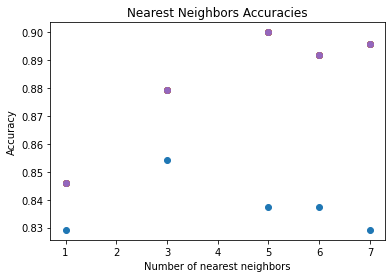

In [ ]:
# Part 2 

# Set filter value to 1 if DP(vk) > p

if __name__ == '__main__':
  list_of_ks = [1, 3, 5, 6, 7]
  list_of_ps = [0.75, 0.8, 0.85, 0.9, 0.95]

  filter_H1 = []    # for p = 0.75
  filter_H2 = []    # for p = 0.8
  filter_H3 = []    # for p = 0.85
  filter_H4 = []    # for p = 0.9
  filter_H5 = []    # for p = 0.95

# first obtain the different graph filters for the different p-values
  new_sorted = np.argsort(new)
  for i in range(len(list_of_ps)):
    cutoff = math.floor(len(new) * list_of_ps[i])
    for j in range(len(new)):
      if (list_of_ps[i] == 0.75):
        if (new_sorted[j] > new_sorted[cutoff]):
          filter_H1.append(1)
        else:
          filter_H1.append(0)
      elif (list_of_ps[i] == 0.8):
        if (new_sorted[j] > new_sorted[cutoff]):
          filter_H2.append(1)
        else:
          filter_H2.append(0)
      elif (list_of_ps[i] == 0.85):
        if (new_sorted[j] > new_sorted[cutoff]):
          filter_H3.append(1)
        else: 
          filter_H3.append(0)
      elif (list_of_ps[i] == 0.9):
        if (new_sorted[j] > new_sorted[cutoff]):
          filter_H4.append(1)
        else:
          filter_H4.append(0)
      else:
        if (new_sorted[j] > new_sorted[cutoff]):
          filter_H5.append(1)
        else:
          filter_H5.append(0) 

# define accuracy lists for the different p-values
  accuracies_p1 = []
  accuracies_p2 = []
  accuracies_p3 = []
  accuracies_p4 = []
  accuracies_p5 = []

  for k in list_of_ks:
    for p in list_of_ps:
      if (p == 0.75):
        temp = filter_H1 * signal_m
        neighbors = nearest_neighbors(temp, histology_m, k)
        accuracies_p1 = accuracies_p1 + [neighbors.solve()]
        print(k, "nearest neighbors, Accuracy:", p, "p-value:", neighbors.solve())
      elif (p == 0.8):
        temp = filter_H2 * signal_m
        neighbors = nearest_neighbors(temp, histology_m, k)
        accuracies_p2 = accuracies_p2 + [neighbors.solve()]
        print(k, "nearest neighbors, Accuracy:", p, "p-value:", neighbors.solve())
      elif (p == 0.85):
        temp = filter_H2 * signal_m
        neighbors = nearest_neighbors(temp, histology_m, k)
        accuracies_p3 = accuracies_p3 + [neighbors.solve()]
        print(k, "nearest neighbors, Accuracy:", p, "p-value:", neighbors.solve())
      elif (p == 0.9):
        temp = filter_H2 * signal_m
        neighbors = nearest_neighbors(temp, histology_m, k)
        accuracies_p4 = accuracies_p4 + [neighbors.solve()]
        print(k, "nearest neighbors, Accuracy:", p, "p-value:", neighbors.solve())
      else:
        temp = filter_H2 * signal_m
        neighbors = nearest_neighbors(temp, histology_m, k)
        accuracies_p5 = accuracies_p5 + [neighbors.solve()]
        print(k, "nearest neighbors, Accuracy:", p, "p-value:", neighbors.solve())

  plt.scatter(list_of_ks, accuracies_p1) 
  plt.scatter(list_of_ks, accuracies_p2)
  plt.scatter(list_of_ks, accuracies_p3)
  plt.scatter(list_of_ks, accuracies_p4)
  plt.scatter(list_of_ks, accuracies_p5)

  plt.ylabel("Accuracy") 
  plt.xlabel("Number of nearest neighbors") 
  plt.title("Nearest Neighbors Accuracies") 
  plt.show()   